# 🚢 Project 3: Exploratory Data Analysis on Titanic Dataset

## 📌 Objective
Perform detailed exploratory data analysis (EDA) on the Titanic dataset to identify trends and patterns related to passenger survival. This involves examining missing values, understanding feature distributions, and analyzing relationships between variables using basic visualizations.

## 📥 Step 1: Import Required Libraries
We'll begin by importing essential Python libraries for data analysis and visualization.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 📂 Step 2: Load the Dataset
We’ll use the training dataset from the [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data) challenge on Kaggle.

In [48]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 Step 3: Data Overview
We’ll examine the dataset’s structure, including number of entries, data types, and missing values.

In [49]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🚫 Step 4: Missing Values Heatmap
Let’s visualize where data is missing to guide our cleaning strategy.

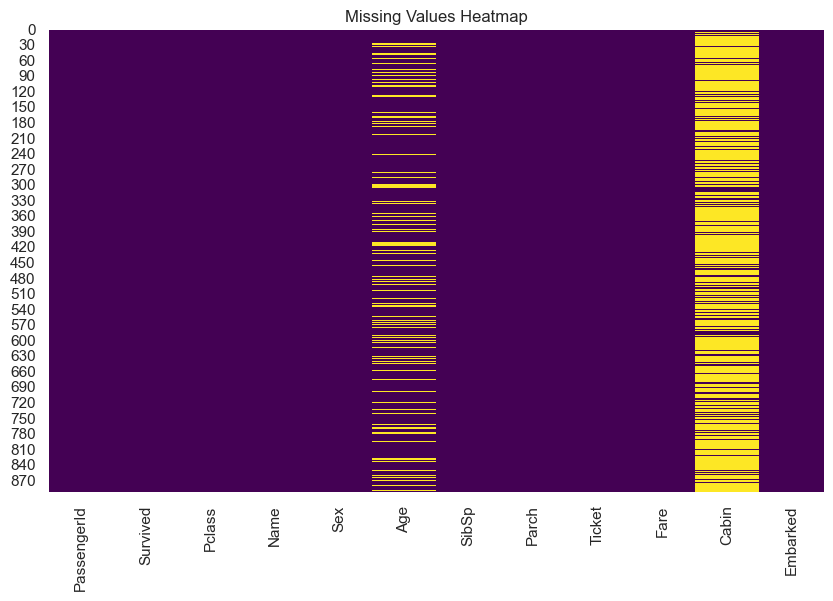

In [50]:
import os
import re

os.makedirs("images", exist_ok=True)
plot_title = "Missing Values Heatmap"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title(plot_title)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

## 📊 Step 5: Univariate Analysis
We’ll explore individual features such as Survived, Sex

### 🎯 Survival Distribution
Let’s explore the target variable: how many passengers survived vs. didn’t.

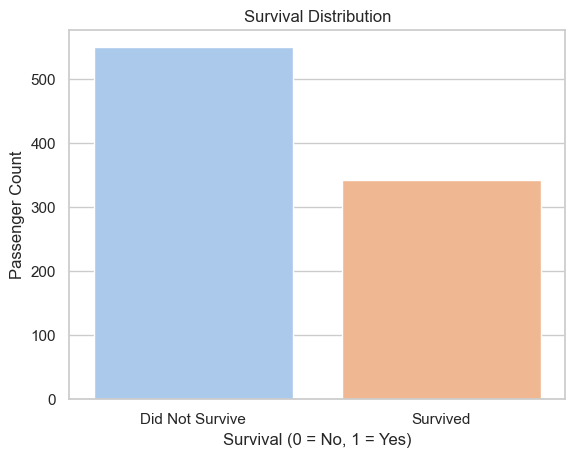

In [51]:
os.makedirs("images", exist_ok=True)
plot_title = "Survival Distribution"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

sns.countplot(x='Survived', hue='Survived', data=df, palette='pastel', legend=False)
plt.title(plot_title)
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

### 👤 Survival by Gender and Passenger Class
We’ll break down survival by gender and class — two highly influential factors.

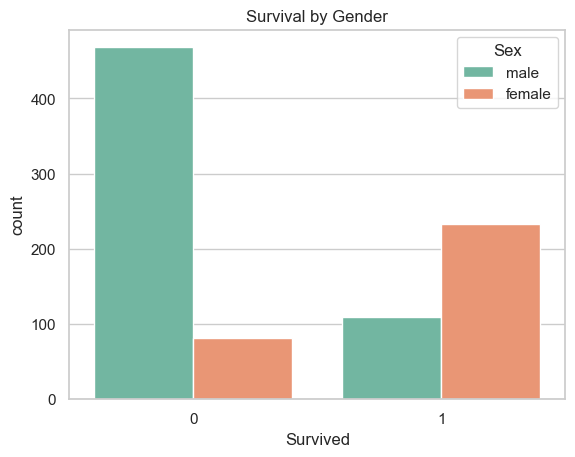

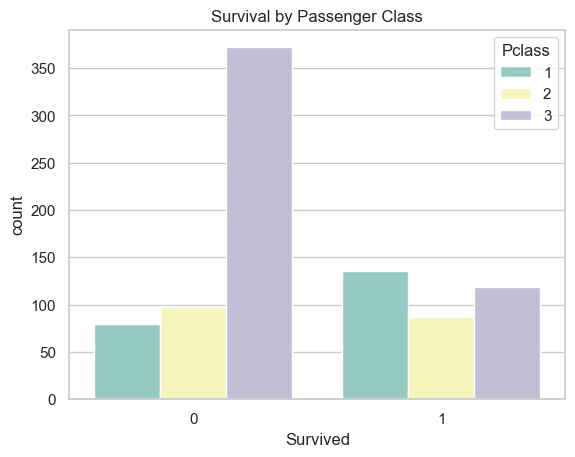

In [52]:
os.makedirs("images", exist_ok=True)
plot_title = "Survival by Gender"
plot_title2 = "Survival by Passenger Class"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
filename2 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title2.lower()) + ".png"

sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title(plot_title)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set3')
plt.title(plot_title2)
plt.savefig(f"images/{filename2}", dpi=300, bbox_inches='tight')
plt.show()

### 📈 Age and Fare Distribution
Let’s visualize how `Age` and `Fare` are distributed across the dataset.

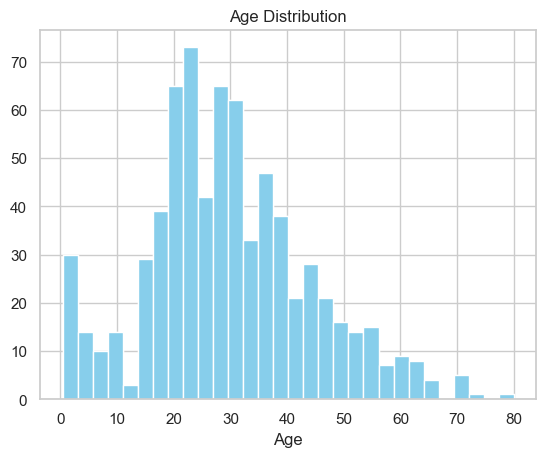

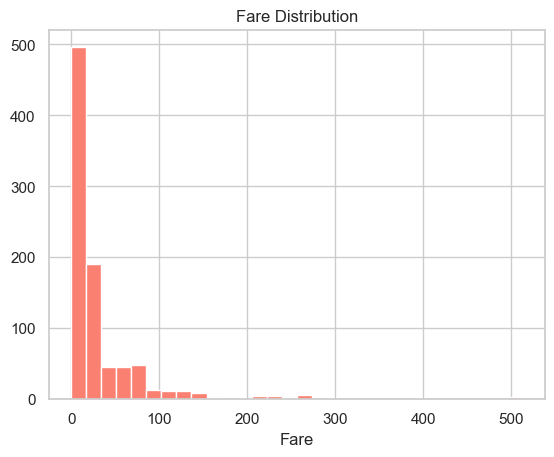

In [53]:
os.makedirs("images", exist_ok=True)
plot_title = "Age Distribution"
plot_title2 = "Fare Distribution"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
filename2 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title2.lower()) + ".png"

df['Age'].hist(bins=30, color='skyblue')
plt.title(plot_title)

df['Age'].hist(bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
plt.show()

df['Fare'].hist(bins=30, color='salmon')
plt.title(plot_title2)
plt.xlabel("Fare")
plt.savefig(f"images/{filename2}", dpi=300, bbox_inches='tight')
plt.show()

### 📦 Boxplots: Age vs. Survival and Fare vs. Class
These visualizations show how numeric features like `Age` and `Fare` relate to survival and class.

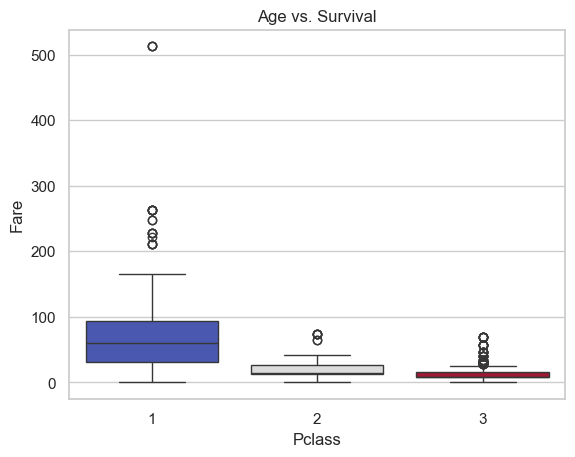

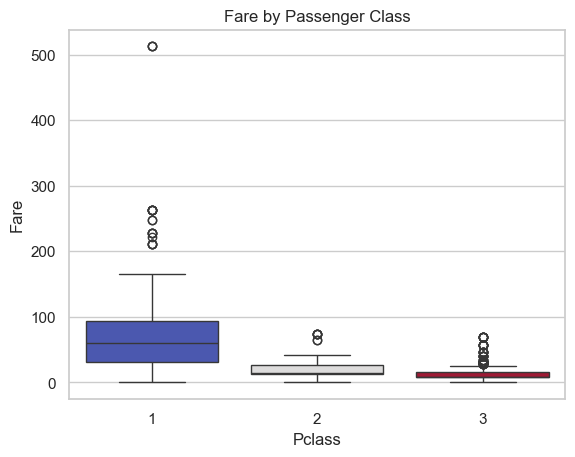

In [54]:
os.makedirs("images", exist_ok=True)
plot_title = "Age vs. Survival"
plot_title2 = "Fare by Passenger Class"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
filename2 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title2.lower()) + ".png"

sns.boxplot(x='Pclass', y='Fare', data=df, hue='Pclass', palette='coolwarm', legend=False)
plt.title(plot_title)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=df, hue='Pclass', palette='coolwarm', legend=False)
plt.title(plot_title2)
plt.savefig(f"images/{filename2}", dpi=300, bbox_inches='tight')
plt.show()

### 🛳️ Survival by Port of Embarkation, SibSp and Parch
Let’s explore more categorical and numeric relationships.

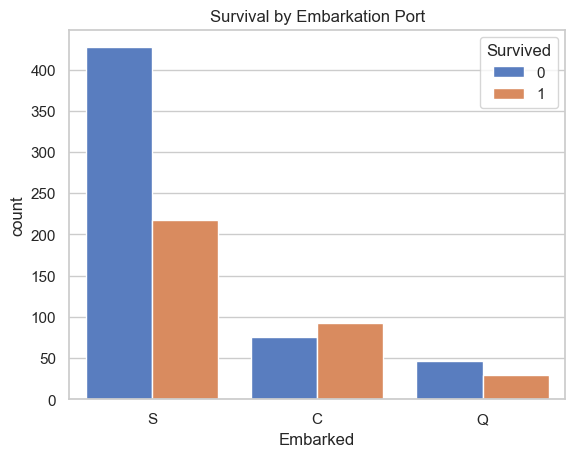

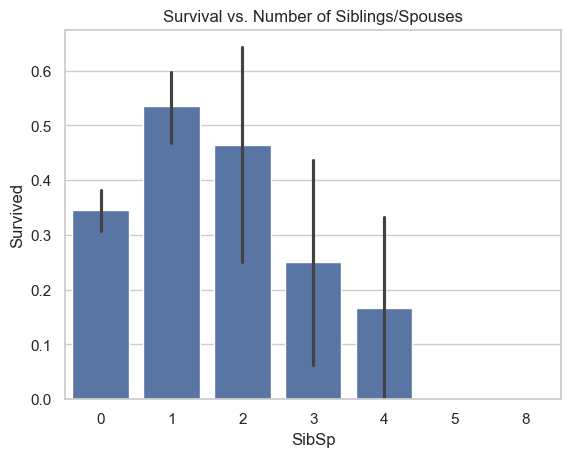

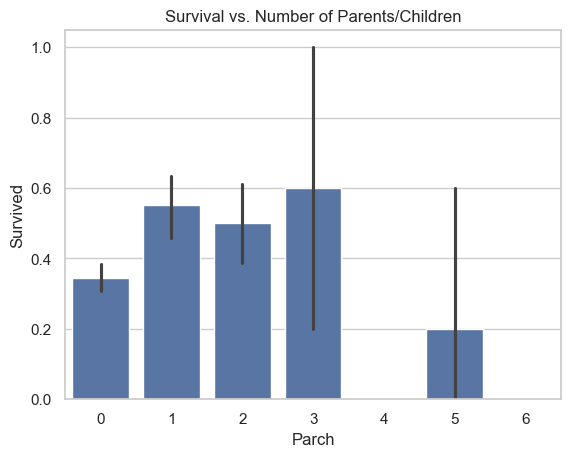

In [55]:
os.makedirs("images", exist_ok=True)
plot_title = "Survival by Embarkation Port"
plot_title2 = "Survival vs. Number of Siblings/Spouses"
plot_title3 = "Survival vs. Number of Parents/Children"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
filename2 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title2.lower()) + ".png"
filename3 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title3.lower()) + ".png"

sns.countplot(x='Embarked', hue='Survived', data=df, palette='muted')
plt.title(plot_title)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

sns.barplot(x='SibSp', y='Survived', data=df)
plt.title(plot_title2)
plt.savefig(f"images/{filename2}", dpi=300, bbox_inches='tight')
plt.show()

sns.barplot(x='Parch', y='Survived', data=df)
plt.title(plot_title3)
plt.savefig(f"images/{filename3}", dpi=300, bbox_inches='tight')
plt.show()
plt.show()

## 🔗 Correlation Matrix

To understand how features relate to each other and to the target (`Survived`), we'll look at a correlation heatmap. This helps identify which features might be useful for modeling.

Only numeric columns are considered in this step.

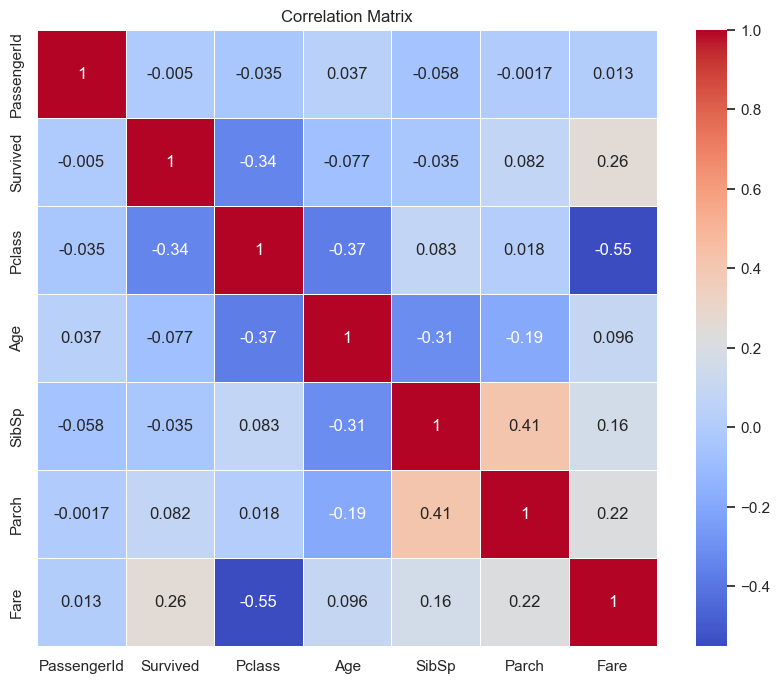

In [56]:
os.makedirs("images", exist_ok=True)
plot_title = "Correlation Matrix"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

# Drop non-numeric columns to avoid errors
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(plot_title)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

## ✅ Conclusion

Through this EDA, we observed:
- Strong survival correlation with gender and class.
- Younger passengers and females had higher chances of survival.
- Fare and Embarked location had moderate influence.

Next steps could include feature engineering, missing value imputation, and model building (in a separate classification project).

This project fulfills **Coding Samurai - Project 3 (EDA)** requirements by demonstrating strong data wrangling, visualization, and statistical analysis skills.